
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [1]:
# Set your student number
student_number = '401106339'
Name = 'Ali'
Last_Name = 'Ghasemzadeh'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [2]:
!pip install tsp_solver2

In [2]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp
from queue import PriorityQueue
import queue


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [145]:
class TSP:
  # TODO : cities, num cities, distances = ?

  def __init__(self, num_cities, cities = None):
    # TODO : if cities is None --> create randomly placed cities with respect to num_cities
    if cities is None:
      self.cities = []
      self.num_cities = num_cities
      x = random.sample(range(0, 1000), num_cities)
      y = random.sample(range(0, 1000), num_cities)
      for i in range(num_cities):
        self.cities.append([x[i], y[i]])      
    # TODO : else --> use the given data
    else:
      self.cities = cities
      self.num_cities = num_cities
    self.distances = []
    n = self.num_cities
    for i in range(n):
      distance = []
      for j in range(n):
        distance.append(self.distance(i, j))
      self.distances.append(distance.copy())
    # note : city axis values can be from 0 to 1000

  def distance(self, A, B):
    # TODO : return distance between city with index/number A and B in cities array
    dx = self.cities[A][0] - self.cities[B][0]
    dy = self.cities[A][1] - self.cities[B][1]
    dz = math.sqrt(dx*dx + dy*dy)  

    return dz

  def tour_length(self, tour):
    # get the list of cities and return the tour length
    dist = 0
    n = len(tour)
    for i in range(n):
      dist = dist + self.distance(tour[i], tour[(i+1)%n])

    return dist

  def shortest_tour(self, tours):
    # TODO : get a list of tours and return : shortest_tour, shortest_length
    bestTourIndex = 0
    bestLength = self.tour_length(tours[0])
    n = len(tours)
    for i in range(1,n):
      dist = self.tour_length(tours[i])
      if dist < bestLength:
        bestTourIndex = i
        bestLength = dist

    return (tours[bestTourIndex], bestLength)

  def plot_tour(self, tour):
    # TODO : tour will be given an its expected to plot a good representation of the tour and cities
    n = len(tour)
    for i in range(n):
      selfCity = self.cities[tour[i]]
      nextCity = self.cities[tour[(i+1)%n]]
      start_point = (selfCity[0],selfCity[1])
      end_point = (nextCity[0], nextCity[1])
      plt.annotate('', xy=end_point, xytext=start_point,arrowprops=dict(arrowstyle='->', color='red', lw=1))
      plt.plot(*start_point, 'bo')
      plt.plot(*end_point, 'bo') 
    return

  def nearest_neighbor(self, A, cities, count = None):
    # city "A" will be given and we expect
    # if count == None -->  get the nearest neighbor from the list "cities"
    # else --> we need "count" closest neighbors
    if count is None:
      shortestDistance = self.distance(A, cities[0])
      shortestIndex = 0
      n = len(cities)
      for i in range(1, n):
        dist = self.distance(A, cities[i])
        if dist < shortestDistance:
          shortestIndex = i
          shortestDistance = dist
      return cities[shortestIndex]
    else:
      pq = PriorityQueue()
      n = len(cities)
      for i in range(n):
        pq.put([self.distance(A, cities[i]), cities[i]])
      arr = []
      for i in range(min(count, pq.qsize())):
        arr.append((pq.get())[1])
      return arr

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [146]:
# Python function to print permutations of a given list
def permutation(lst):
    # If lst is empty then there are no permutations
    if len(lst) == 0:
        return []
    # If there is only one element in lst then, only
    # one permutation is possible
    if len(lst) == 1:
        return [lst]
    # Find the permutations for lst if there are
    # more than 1 characters
    l = [] # empty list that will store current permutation
    # Iterate the input(lst) and calculate the permutation
    for i in range(len(lst)):
       m = lst[i]
       # Extract lst[i] or m from the list.  remLst is
       # remaining list
       remLst = lst[:i] + lst[i+1:]
       # Generating all permutations where m is first
       # element
       for p in permutation(remLst):
           l.append([m] + p)
    return l

def alltours_tsp(tsp):
    # TODO : generate all possible tours and return the shortest tour
    # note : don't create duplicate possible tours
    n = tsp.num_cities
    allTours = permutation(list(range(n)))
    return (tsp.shortest_tour(allTours))[0]

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [147]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : present the answer
tsp = TSP(5)
shortestTour = alltours_tsp(tsp)

Visualize your answer for the TSP problem

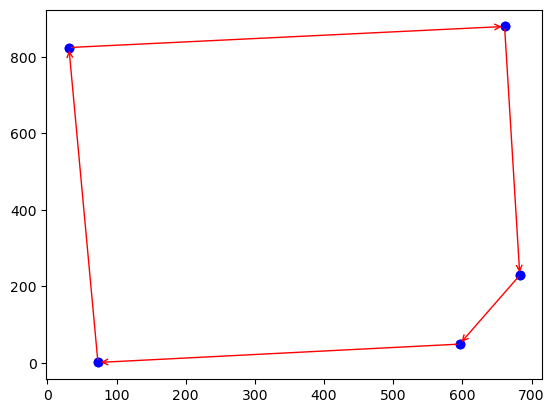

In [148]:
# TODO : plot the answer using the TSP util methods
tsp.plot_tour(shortestTour)



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

0.0
0.008005380630493164
0.20843744277954102
28.73788356781006


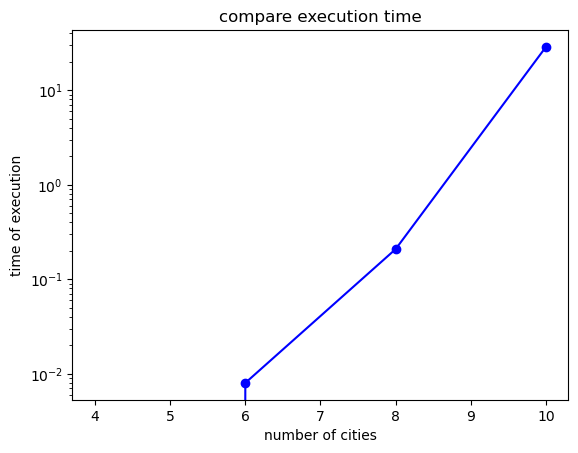

In [150]:
# TODO: create different countries
# TODO: run the algorithm and consider its run time
# TODO: plot the run times accordingly
# note : you can use log(time) for better visualisation
# note : given example is using log
start = time.time()
tsp = TSP(4)
shortestTour = alltours_tsp(tsp)
end = time.time()
time4 = end - start
print(time4)

start = time.time()
tsp = TSP(6)
shortestTour = alltours_tsp(tsp)
end = time.time()
time6 = end-start
print(time6)

start = time.time()
tsp = TSP(8)
shortestTour = alltours_tsp(tsp)
end = time.time()
time8 = end - start
print(time8)

start = time.time()
tsp = TSP(10)
shortestTour = alltours_tsp(tsp)
end = time.time()
time10 = end - start
print(time10)

plt.plot(np.array([4, 6, 8, 10]), np.array([time4, time6, time8, time10]), marker='o', linestyle='-', color='blue')
plt.yscale('log')
plt.xlabel('number of cities')
plt.ylabel('time of execution')
plt.title('compare execution time')
plt.show()

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [151]:
def random_initial(tsp):
  # TODO : create a random tour and return tour, length
  # TODO check
  n = tsp.num_cities
  tour = random.sample(range(0, n), n) # create a ranodm order of cities numbers  
  dist = tsp.tour_length(tour) # distance of a city
  return [tour, dist]

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [152]:
def nearest_neighbor_initial(tsp):
  # TODO : create a nearest neighbor tour as above and return tour, length
  n = tsp.num_cities
  start = random.randint(0, n-1) # start at a random city 
  cities = list(range(n)) # list of cities number
  tour = [] 
  tour.append(start)
  # start at a random node and add the not visited nearest neighbor of the last node 
  for i in range(n-1):
    cities.remove(start)
    start = tsp.nearest_neighbor(start, cities)
    tour.append(start)
  return tour

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [153]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
    # TODO : repeat nearest_neighbor_initial for better performance
    # note : if repetitions == None --> repetition = tsp.city_num
    if repetitions is None:
        repetitions = tsp.num_cities
    allTours = []
    # run the last function at top again and again
    for i in range(repetitions):
        tour = nearest_neighbor_initial(tsp)
        allTours.append(tour)
    
    return allTours

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

5362.699792283853 [29, 9, 28, 5, 21, 11, 24, 17, 26, 15, 23, 1, 0, 8, 25, 7, 2, 12, 14, 13, 22, 16, 20, 4, 18, 10, 27, 3, 19, 6]
5163.106697982588 [15, 23, 1, 0, 8, 25, 7, 2, 12, 14, 13, 22, 16, 20, 4, 18, 10, 27, 3, 28, 5, 29, 9, 19, 26, 17, 24, 21, 11, 6]
5009.694940609717 [24, 17, 26, 15, 23, 1, 0, 8, 25, 7, 2, 12, 14, 13, 22, 16, 20, 4, 18, 10, 27, 3, 28, 5, 29, 9, 19, 21, 11, 6]
5028.045924419705 [21, 11, 24, 17, 26, 15, 23, 1, 0, 8, 25, 7, 2, 12, 14, 13, 22, 16, 20, 4, 18, 10, 27, 3, 28, 5, 29, 9, 19, 6]


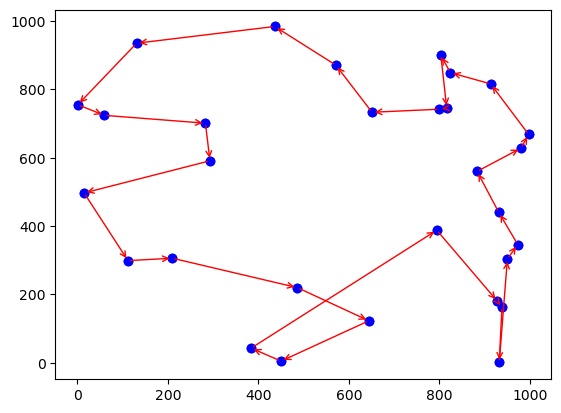

In [155]:
# TODO: create different countries
# TODO: run the algorithm and consider its tour length
# TODO: plot/print the tour lengths accordingly
num_cities = 30
cities = []
x = random.sample(range(0, 1000), num_cities)
y = random.sample(range(0, 1000), num_cities)
for i in range(num_cities):
    cities.append([x[i], y[i]])  
tsp = TSP(num_cities, cities)
repetitions = 1
alltours = []
alltours.append(repeated_nearest_neighbor_initial(tsp, repetitions))

repetitions = 4
alltours.append(repeated_nearest_neighbor_initial(tsp, repetitions))

repetitions = 8
alltours.append(repeated_nearest_neighbor_initial(tsp, repetitions))

repetitions = 12
alltours.append(repeated_nearest_neighbor_initial(tsp, repetitions))

shortestTour = []
for i in range(4):
    shortestTour.append(tsp.shortest_tour(alltours[i]))

for i in range(4):
    print(shortestTour[i][1], shortestTour[i][0])


shortestT = shortestTour[0][0]
shortestL = shortestTour[0][1]
for i in range(1, 4):
    if shortestL > shortestTour[i][1]:
        shortestL = shortestTour[i][1]
        shortestT =  shortestTour[i][0]

tsp.plot_tour(shortestT)
# use repeated_nearest_initial function with frequencty of 1 and 4 and 8 and 12
# and print their answers and then plot the best answer

Does repetition make our answer optimal? "No but it increase its probability"

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [156]:
def beam_search_initial(tsp, n, iter):
  # TODO : initial n starting points and name it as queue
  # TODO : in every iter : (iter range could not be less than tsp.city_num)
  # TODO : use the queue elements to create n new elements from each (new elements contain more cities)
  # TODO : filter these n^2 elements and just use n of them and name them as queue
  # TODO : return tour, length of the best option in queue
  startingPoints = random.sample(range(0, tsp.num_cities), n)
  stages = queue.Queue()
  for i in range(0, n):
    stages.put([0, [startingPoints[i]]])

  # use PriorityQueue or min_heap to get the n minimum numbers between n^2 numbers
  for i in range(tsp.num_cities - 1):
    semiTours = PriorityQueue()
    for j in range(0, n):
      stage = stages.get()
      distance = stage[0]
      elements = (stage[1]).copy()
      lenElement = len(elements)
      cities = [l for l in range(tsp.num_cities) if l not in elements]
      len_cities = len(cities)
      neighborsOfLastElement = tsp.nearest_neighbor(elements[lenElement-1], cities, n)
      for k in range(min(n, len_cities)):
        semiTour = elements.copy()
        semiTour.append(neighborsOfLastElement[k])
        dist = distance + tsp.distance(semiTour[lenElement-1], semiTour[lenElement])
        if i == (tsp.num_cities-1):
          dist = dist + tsp.distance(semiTour[0], semiTour[lenElement])
        semiTours.put([dist ,semiTour])
    for j in range(0, n):
      stages.put(semiTours.get())  
  alltours =  []
  for i in range(0, n):
    alltours.append((stages.get())[1])

  # if iter is larger than tsp.num_cities then swap some elements of n best answers and add them to the list 
  # if they have a shortest tour and after all return the tour with the shortest length between them
  iter = iter - tsp.num_cities
  for i in range(iter):
    swap =  random.sample(range(0, tsp.num_cities), 2)
    if swap[1] < swap[0]:
      t = swap[1]
      swap[1] = swap[0]
      swap[0] = t
    for j in range(0, n):
      distance1 = tsp.tour_length(alltours[j])
      t = alltours[j] # should swap
      alltours[j][swap[0]:swap[1]] = alltours[j][swap[0]:swap[1]][::-1]
      distance2 = tsp.tour_length(alltours[j])
      if distance2 > distance1:
        alltours[j][swap[0]:swap[1]] = alltours[j][swap[0]:swap[1]][::-1]

  return (tsp.shortest_tour(alltours))[0]

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [167]:
# TODO: create a country
# TODO: run the needed algorithms and consider their tour length
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.
num_cities = 30
repetitions = 10
cities = []
x = random.sample(range(0, 1000), num_cities)
y = random.sample(range(0, 1000), num_cities)
for i in range(num_cities):
    cities.append([x[i], y[i]])  
tsp = TSP(num_cities, cities)

# random_initial length
randomTour = (random_initial(tsp))[0]

# nearest_neighbor_initial
nearest_neighbor_initial_tour = nearest_neighbor_initial(tsp)

# repeated_nearest_neighbor_initial
repeated_nearest_neighbor_initial_tour = tsp.shortest_tour(repeated_nearest_neighbor_initial(tsp, repetitions))[0]

# beam_search_initial length
beamTour = beam_search_initial(tsp, 5, 100)

Plot these tours and compare them visually.

16229.079295243693


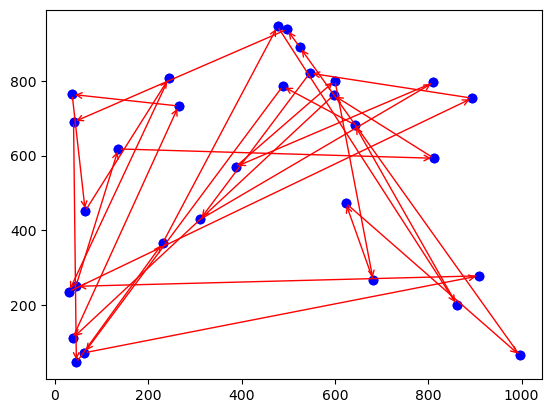

In [168]:
# TODO: plot the tours accordingly (random)
tsp.plot_tour(randomTour)
print(tsp.tour_length(randomTour))

5839.315292702708


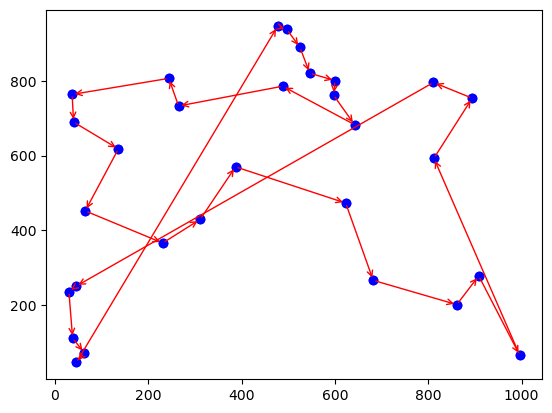

In [169]:
# TODO: plot the tours accordingly (nn)
tsp.plot_tour(nearest_neighbor_initial_tour)
print(tsp.tour_length(nearest_neighbor_initial_tour))

5268.0168352137935


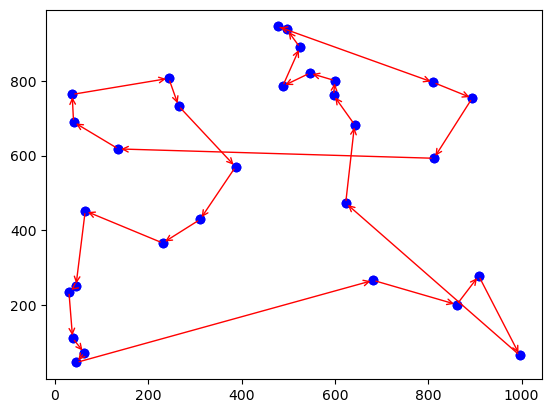

In [170]:
# TODO: plot the tours accordingly (rnn)
tsp.plot_tour(repeated_nearest_neighbor_initial_tour)
print(tsp.tour_length(repeated_nearest_neighbor_initial_tour))

5347.417184728497


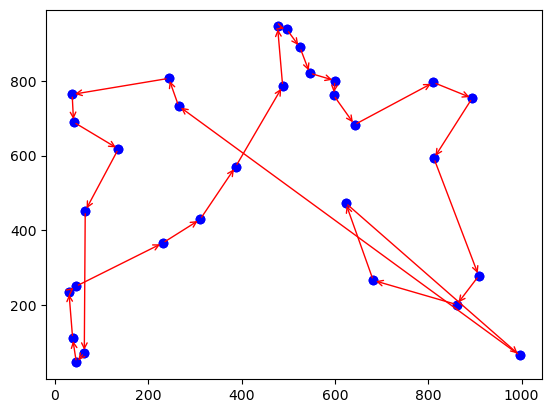

In [171]:
# TODO: plot the tours accordingly (beam)
tsp.plot_tour(beamTour)
print(tsp.tour_length(beamTour))

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [172]:
def lin_kernighan(tsp, initial, iterations=10):
    # TODO : init
    # TODO : for iteration :
      # TODO : for every distinct pair of (i, j):
        # TODO : If the reverse technique improves our tour, replace the reversed version with the actual version.
        # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10
    tourLength = len(initial)
    shortestDistance = tsp.tour_length(initial)
    for k in range(iterations):
      for i in range(tourLength):
        for j in range(i, tourLength):
          initial[i:j] = initial[i:j][::-1]
          distance = tsp.tour_length(initial)
          if shortestDistance < distance:
            initial[i:j] = initial[i:j][::-1]
          else:
            shortestDistance = distance
             
    # TODO :  return tour, distance
    return [initial, shortestDistance]


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

14736.826889151223


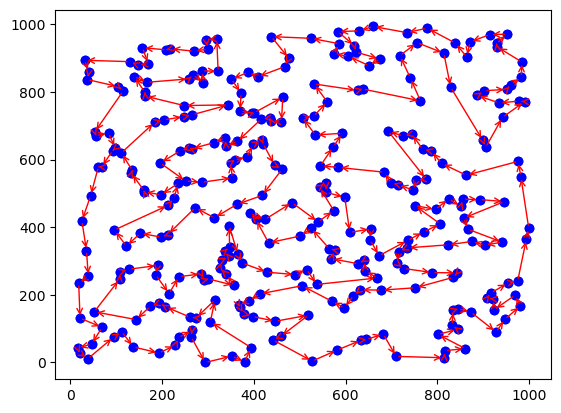

In [173]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer
tsp = TSP(300)
tour = lin_kernighan(tsp, (random_initial(tsp))[0])
tsp.plot_tour(tour[0])
print(tsp.tour_length(tour[0]))

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [174]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
    # TODO : init
    # TODO : for iterantion:
      # TODO : get a neighbor
      # note : create neighbors using the reversing method, but this time improvement is not important
      # TODO : with the acceptence probability, accept!
      # TODO : if it has a improvement, accept!
      # TODO : update tour if accepted
      # TODO : update temp
    k = 0
    best_tour = initial.copy()
    best_len = tsp.tour_length(initial)
    temperature = initial_temperature
    initial_len = best_len
  
    while k < num_iterations and temperature > 0:
      swap = random.sample(range(0, tsp.num_cities), 2)
      if swap[1] < swap[0]:
        t = swap[1]
        swap[1] = swap[0]
        swap[0] = t
      initial[swap[0]:swap[1]] = initial[swap[0]:swap[1]][::-1]
      swap_len = tsp.tour_length(initial)
      prob = 0
      if (abs(swap_len - initial_len)/temperature) < 100:
        prob = np.exp((initial_len-swap_len)/temperature)
      if swap_len < initial_len or random.random() < prob:
        initial_len = swap_len
        if swap_len < best_len:
          best_len = swap_len
          best_tour = initial.copy()
      else:
        initial[swap[0]:swap[1]] = initial[swap[0]:swap[1]][::-1]
      
      k = k+1
      temperature *= cooling_rate
    
    # return tour, length
    return [best_tour, best_len]

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

4976.999327559282


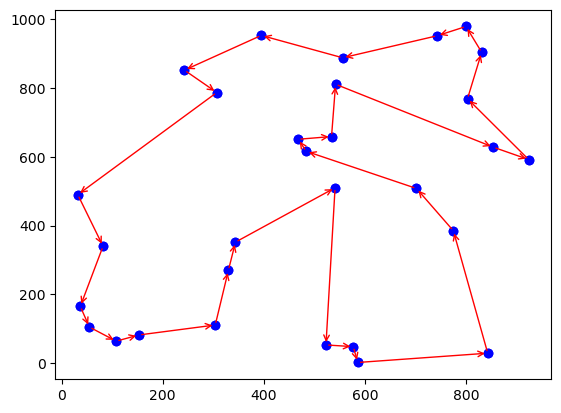

In [175]:
# TODO : create a country using the TSP class
# TODO : run the algorithm
# TODO : plot the answer
tsp = TSP(30)
initial = random_initial(tsp)
tour = simulated_annealing(tsp, initial[0])
tsp.plot_tour(tour[0])
print(tsp.tour_length(tour[0]))

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

4967.017342935505


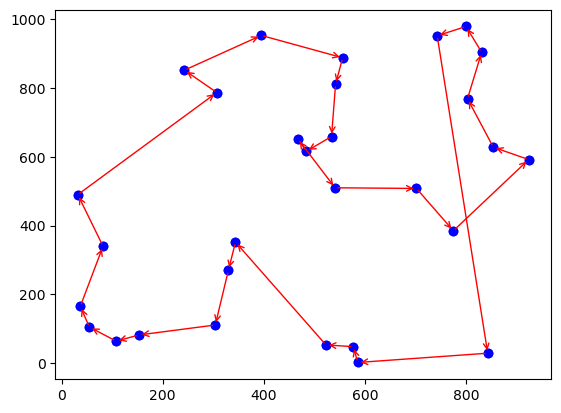

In [176]:
path = solve_tsp(tsp.distances)
tsp.plot_tour(path)
print(tsp.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

cities number :   30
ready function :   4998.736531071365
lkh random :   5156.4922925157625
lkh nn :   4679.2403912062055
lkh rnn :   4684.810545106638
lkh beam :   4748.290739434821
simulated random :   4908.619920356247
simulated nn :   4679.2403912062055
simulated rnn :   4674.477777843018
simulated beam :   4748.290739434821


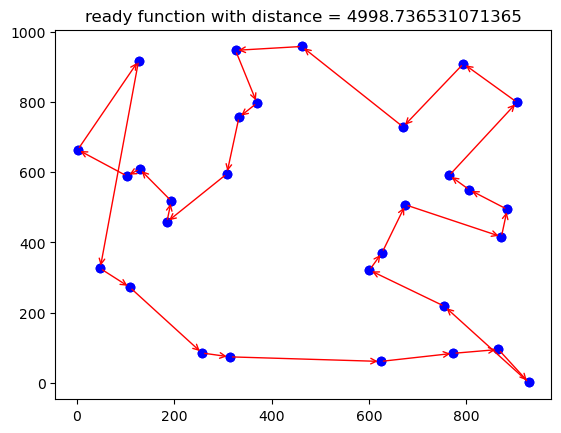

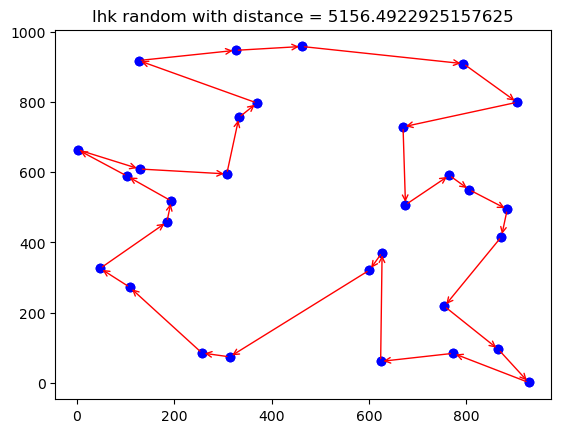

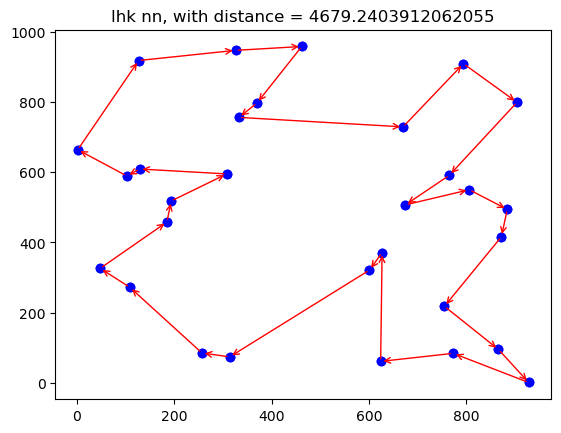

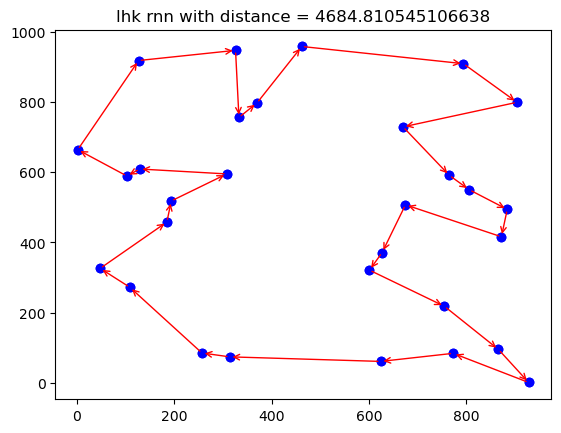

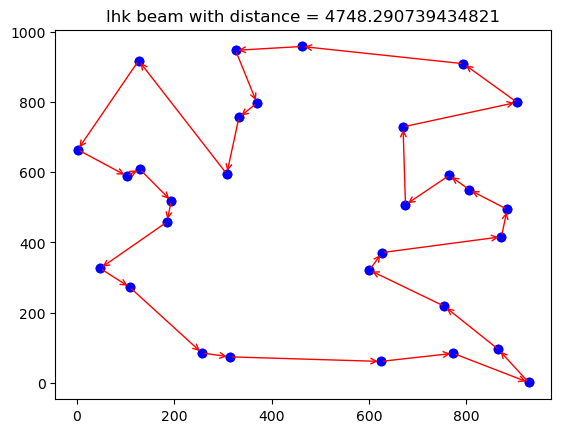

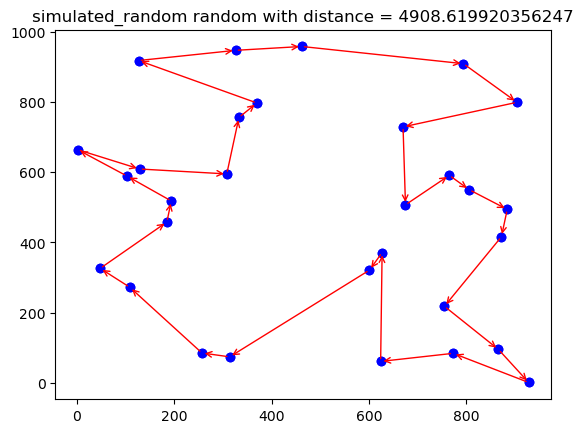

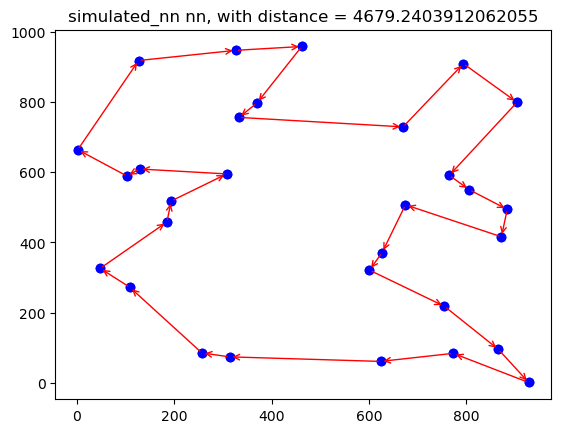

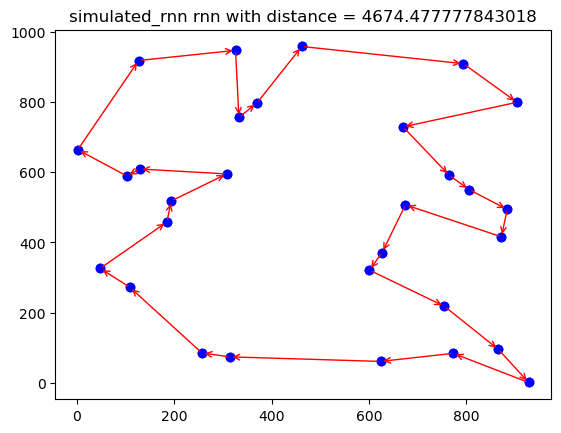

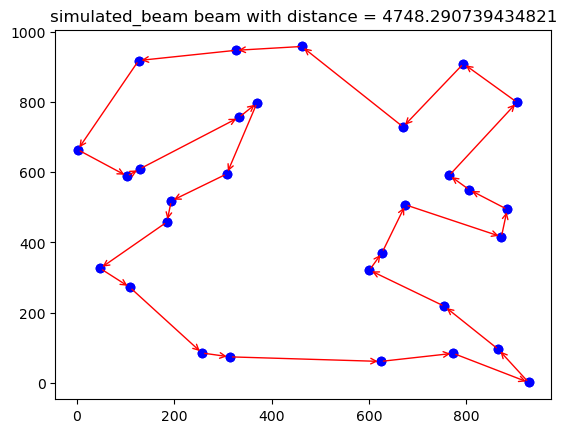

In [182]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function

tsp = TSP(30)
initial = random_initial(tsp)
nn = nearest_neighbor_initial(tsp)
rnn = tsp.shortest_tour(repeated_nearest_neighbor_initial(tsp))
beam = beam_search_initial(tsp, 5, 10)

lkh_random = lin_kernighan(tsp, initial[0])
lkh_nn = lin_kernighan(tsp, nn)
lkh_rnn = lin_kernighan(tsp, rnn[0])
lkh_beam = lin_kernighan(tsp, beam)

simulated_random = simulated_annealing(tsp, initial[0])
simulated_nn = simulated_annealing(tsp, nn)
simulated_rnn = simulated_annealing(tsp, rnn[0])
simulated_beam = simulated_annealing(tsp, beam)


    
print("cities number :  " , tsp.num_cities)
path = solve_tsp(tsp.distances)
print("ready function :  ", tsp.tour_length(path))

print("lkh random :  ", lkh_random[1])
print("lkh nn :  ", lkh_nn[1])
print("lkh rnn :  ", lkh_rnn[1])
print("lkh beam :  ", lkh_beam[1])

print("simulated random :  ", simulated_random[1])
print("simulated nn :  ", simulated_nn[1])
print("simulated rnn :  ", simulated_rnn[1])
print("simulated beam :  ", simulated_beam[1])

tsp.plot_tour(path)
plt.title('ready function with distance = ' + str(tsp.tour_length(path)))
plt.show()
tsp.plot_tour(lkh_random[0])
plt.title('lhk random with distance = '+ str(lkh_random[1]))
plt.show()
tsp.plot_tour(lkh_nn[0])
plt.title('lhk nn, with distance = ' + str(lkh_nn[1]))
plt.show()
tsp.plot_tour(lkh_rnn[0])
plt.title('lhk rnn with distance = ' + str(lkh_rnn[1]))
plt.show()
tsp.plot_tour(lkh_beam[0])
plt.title('lhk beam with distance = ' + str(lkh_beam[1]))
plt.show()

tsp.plot_tour(simulated_random[0])
plt.title('simulated_random random with distance = '+ str(simulated_random[1]))
plt.show()
tsp.plot_tour(simulated_nn[0])
plt.title('simulated_nn nn, with distance = ' + str(simulated_nn[1]))
plt.show()
tsp.plot_tour(simulated_rnn[0])
plt.title('simulated_rnn rnn with distance = ' + str(simulated_rnn[1]))
plt.show()
tsp.plot_tour(simulated_beam[0])
plt.title('simulated_beam beam with distance = ' + str(simulated_beam[1]))
plt.show()

python ready function 5192.974474873795


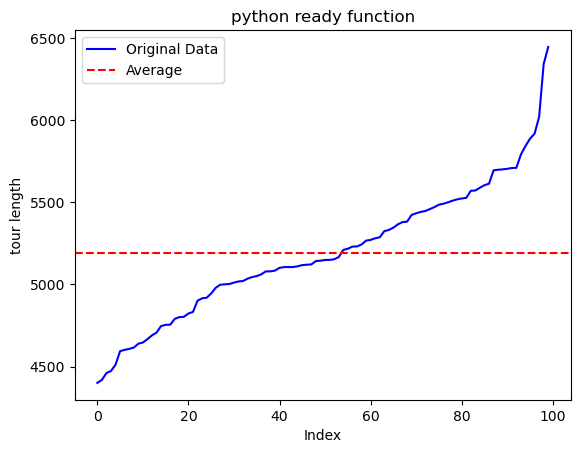

lkh random 4873.335299403326


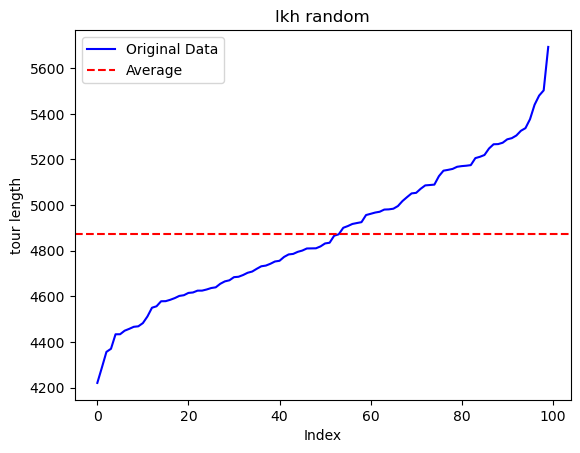

lkh nn 4843.237203505097


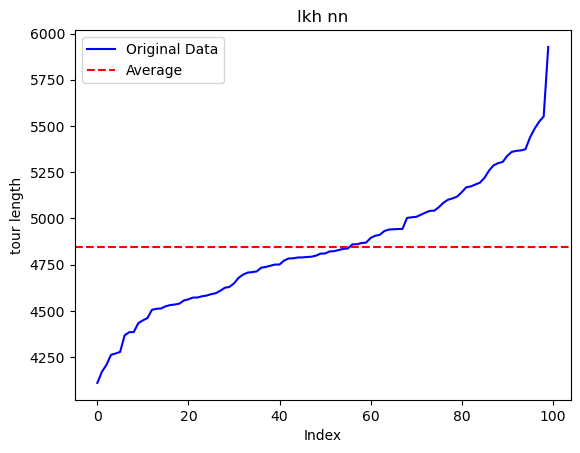

lkh rnn 4759.855970853913


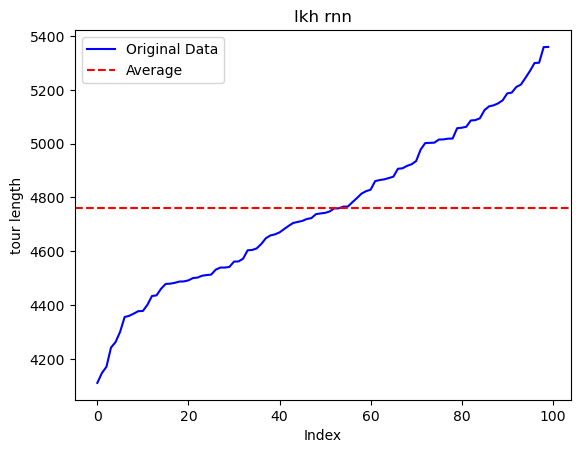

lkh beam 4870.503925157346


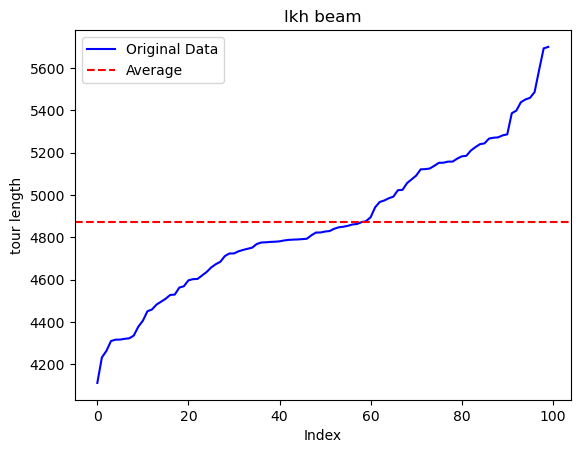

simulated random 4746.948878496595


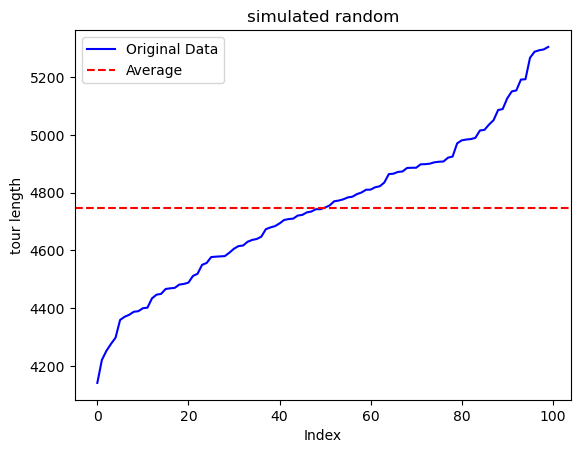

simulated nn 4749.4971992605915


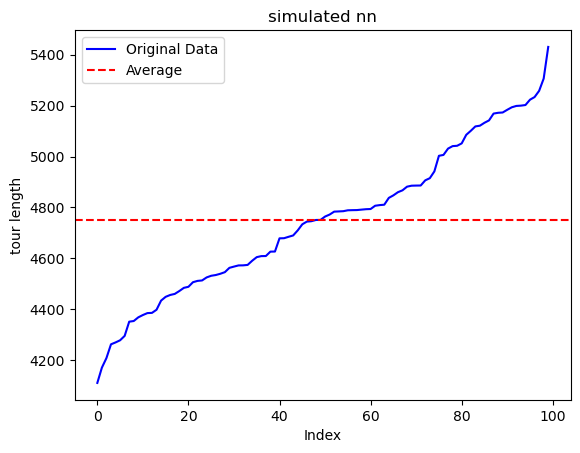

simulated rnn 4711.591758087778


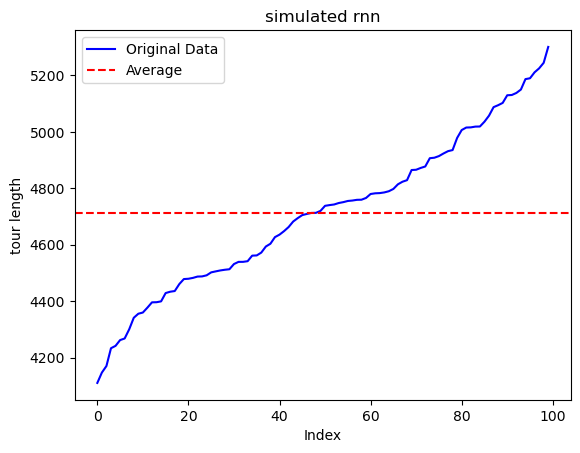

simulated beam 4765.885291764616


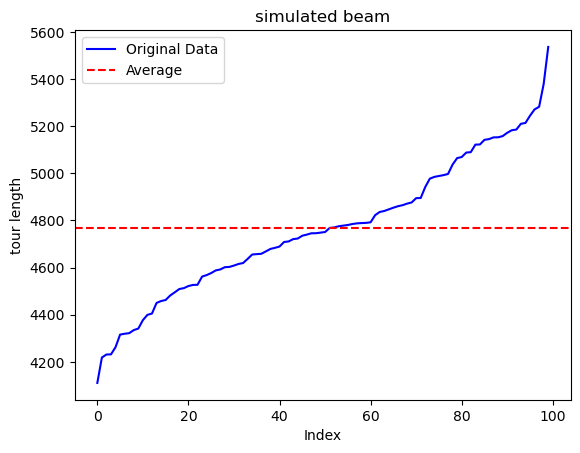

(None, None)

In [199]:
#addional box for comparing different algorithms in average case
def plot(data, title):
    data = np.sort(np.array(data))
    average_value = np.mean(data)
    print(title + " " + str(average_value))
    plt.plot(data, color='blue', label='Original Data')
    plt.axhline(y=average_value, color='red', linestyle='--', label='Average')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('tour length')
    plt.legend()
    plt.show()
    return average_value

lr,lnn,lrnn,lbeam = [],[],[],[]
sr,snn,srnn,sbeam = [],[],[],[]
ready = []
cities_number = 30
iteraion_number = 100
for i in range(iteraion_number):
    tsp = TSP(cities_number)
    initial = random_initial(tsp)
    nn = nearest_neighbor_initial(tsp)
    rnn = tsp.shortest_tour(repeated_nearest_neighbor_initial(tsp))
    beam = beam_search_initial(tsp, 5, 10)

    lkh_random = lin_kernighan(tsp, initial[0])
    lkh_nn = lin_kernighan(tsp, nn)
    lkh_rnn = lin_kernighan(tsp, rnn[0])
    lkh_beam = lin_kernighan(tsp, beam)

    simulated_random = simulated_annealing(tsp, initial[0])
    simulated_nn = simulated_annealing(tsp, nn)
    simulated_rnn = simulated_annealing(tsp, rnn[0])
    simulated_beam = simulated_annealing(tsp, beam)

    path = solve_tsp(tsp.distances)

    ready.append(tsp.tour_length(path))
    
    lr.append(lkh_random[1])
    lnn.append(lkh_nn[1])
    lrnn.append(lkh_rnn[1])
    lbeam.append(lkh_beam[1])

    sr.append(simulated_random[1])
    snn.append(simulated_nn[1])
    srnn.append(simulated_rnn[1])
    sbeam.append(simulated_beam[1])

dist = []
name = []
dist.append(plot(ready, "python ready function")), name.append("python ready function")
dist.append(plot(lr, "lkh random")),name.append("lkh random")
dist.append(plot(lnn, "lkh nn")),name.append("lkh nn")
dist.append(plot(lrnn, "lkh rnn")),name.append("lkh rnn")
dist.append(plot(lbeam, "lkh beam")),name.append("lkh beam")
dist.append(plot(sr, "simulated random")),name.append("simulated random")
dist.append(plot(snn, "simulated nn")),name.append("simulated nn")
dist.append(plot(srnn, "simulated rnn")),name.append("simulated rnn")
dist.append(plot(sbeam, "simulated beam")),name.append("simulated beam")


In [200]:
for i in range(len(dist)):
    print(name[i] + " = " + str(dist[i]))

python ready function = 5192.974474873795
lkh random = 4873.335299403326
lkh nn = 4843.237203505097
lkh rnn = 4759.855970853913
lkh beam = 4870.503925157346
simulated random = 4746.948878496595
simulated nn = 4749.4971992605915
simulated rnn = 4711.591758087778
simulated beam = 4765.885291764616


<p dir="rtl">
 طبق موارد مشاهده شده پس از صدبار iteration مشاهده می شود که simulated rnn در حالت متوسط بهتر از بقیه عمل میکند و دور کوتاه تری را پیدا میکند همچنین الگوریتم های simulated هم طبق مشاهدات  بهتر از الگوریتم های lkh عمل می کنند این بخاطر این است که این الگوریتم ها حالت رندوم را هم دخیل کرده اند و احتمال افتادن در مینیمم محلی کمتر میشود.
 <br>
 همچنین این الگوریتم ها بهتر از تابع آماده پایتون عمل کردند 
 <br>
 در بین الگوریتم های lkh  بهترین عملکرد با lkh rnn  بود زیرا چندین بار الگوریتم nn را اجرا کرده و بهترین آنرا انتخاب کرده و این باعث بهتر شدن حالت شروع میشود.
 در این بین الگوریتم بیم از همه بدتر عمل کرده است زیرا در حالات اولیه ممکنه است حالتی باشد که طول semi tour آن زیادتر از بقیه باشد ولی در ادامه طول کمتری نسبت به سایرین داشته باشد ولی بیم سرچ هر بار n تای بهتر را انتخاب کرده و با این کار احتمال افتادن در مینیمم محلی زیاد می شود ولی با این حال کمی بهتر از حالت رندوم عمل کرده است
 <br>
 در بین الگوریتم های simulated بهترین حالت به simulated rnn است که چون rnn حاصل چندین بار کال کردن nn و انتخاب بهترین آنها است بهتر از random, nn کار میکند همچنین بیم سرچ هم همانطور که بالاتر گفته شد احتمال افتادنش در مینیمم محلی بیشتر است که البته مقدار خوبی از آن بخاطر رندوم بودن simulated جبران میشود ولی همچنان بدتر از حالت های دیگر است 
 <br>
 همچنین simulated nn احتمالا در مینیمم محلی افتاده است و به همین خاطر طول دور آن کمی بیشتر از طول دور حالت رندوم شده است که این اتفاق در ولی این حالت در الگوریتم های lkh nn, lkh random نیفتاد و حالت nn بهتر عمل میکرد
 <br>
 در نهایت کوتاه ترین دور را simulated rnn پیدا کرد به طور متوسط و به طور متوسط الگوریتم simulated بهتر از الگوریتم lkh عمل کرد
 <br>
 در واقعا اگر الگوریتم ها را بر اساس طول دور مرتب کنیم داریم : <br>
</p>
<pre style="color:blue">
simulated_rnn&ltsimulated_random&ltsimulated_nn&ltlkh_rnn&ltsimulated_beam&ltlkh_nn&ltlkh_beam&ltlkh_random&ltpython_ready_func
</pre>